<a class="anchor" id="0"></a>
# Comprehensive Guide to ANN with Keras


Hello friends,


In this kernel, I build an ANN model to classify the MNIST digits. En route, I will show various steps to build the ANN model to classify the MNIST digits with Keras library. I will show how to compile, train and evaluate the model.

<a class="anchor" id="0.1"></a>
## Table of Contents

1. [Introduction to Artificial Neural Network (ANN)](#1)
1. [Input Data to a Neural Network](#2)
1. [MNIST dataset](#3)
1. [Data representation in Keras](#4)
1. [Data normalization in Keras](#5)
1. [Densely connected networks in Keras](#6)
   - 6.1 [Sequential Class in Keras](#6.1)
   - 6.2 [Defining the model](#6.2)  
1. [Model Summary](#7)
   - 7.1 [Parameters of the model](#7.1)
1. [Implementation of Neural Network in Keras](#8)
   - 8.1 [Compilation of model](#8.1)
   - 8.2 [Training the model](#8.2)
   - 8.3 [Evaluation of model](#8.3)
1. [Accuracy of the model](#9)
1. [Confusion-matrix](#10)
1. [Generate predictions](#11)
1. [ANN- The Complete Example](#12)
1. [Conclusion](#13)
1. [References](#14)

   

## 1. Introduction to Artificial Neural Network (ANN) <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)


- An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

- Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron that receives a signal then processes it and can signal neurons connected to it.

For detailed discussion on ANN, please visit:

[Artificial Neural Network](https://en.wikipedia.org/wiki/Artificial_neural_network)


For simplified working of ANN, please vist:

[Working of ANN in simple terms](https://www.analyticsvidhya.com/blog/2014/10/ann-work-simplified/)



## 2. Input Data to a Neural Network <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

- For the construction and evaluation of a model in Deep Learning, the available data are divided into three sets:
**training data**, **validation data** and **test data**.

- The **training data** is used for the learning algorithm to obtain the parameters of the model.

- Now, suppose the overfitting exists. Then, we would modify the value of certain hyperparameters and after training it again with the training data, we would evaluate it again with the **validation data**.  We can make these adjustments of the hyperparameters guided by the validation data until we obtain optimum results.

- The validation data have influenced the model so that it also fits the validation data. So, we always reserve a set of **test data** for final evaluation of the model that will only be used at the end of the whole process, when we consider that the model is already fine-tuned and we will no longer modify any of its hyperparameters.

## 3. MNIST dataset <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)


- MNIST is a collection of handwritten digits ranging from the number 0 to 9.

- It has a training set of 60,000 images and 10,000 test images that are classified into corresponding categories or labels.

- In Keras the MNIST dataset is preloaded in the form of four Numpy arrays.

- To use the MNIST dataset in Keras, an API is provided to download and extract images and labels automatically.

- The following Keras code shows how to access MNIST dataset, plot 25 random samples, and count the number of labels for train and test datasets:

In [4]:
# import necessary libraries
import keras
import numpy as np


# load dataset
from keras.datasets import mnist


# split dataset into training and test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Training and Test set

- `x_train` and `y_train` contain the training set, while

- `x_test` and `y_test` contain the test set.

- The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

### Check the values loaded


- To check the values that we have loaded, we choose any of the images of the MNIST set, say for example image 7, and write the following Python code:

In [5]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
y_train[3]

1

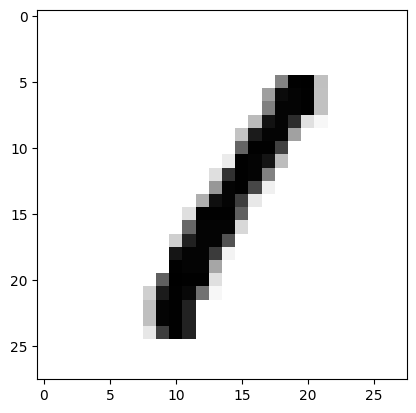

In [7]:
# Display images

import matplotlib.pyplot as plt
plt.imshow(x_train[3], cmap=plt.cm.binary)

We get the above image.

In [8]:
print(y_train[3])

1


In [9]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

### View the corresponding labels

- To see its corresponding label we can write the following Python code:

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
# View the labels
print(y_train[0])

5


It returns the value of "3", as expected.

## 4. Data representation in Keras <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)

- Keras uses a multidimensional array of Numpy as a basic data structure. We call this data structure a **tensor**.

- A tensor has three main attributes:

  - **Number of axes (Rank)**:  
  
    - A tensor containing a single number will be called **scalar** (or a 0-dimensional tensor, or tensor 0D).
    - An array of numbers is called **vector**, or tensor 1D.
    - An array of vectors will be a matrix, or 2D tensor.
    - If we pack this matrix in a new array, we get a 3D tensor, which we can interpret visually as a cube of numbers.
    - By packaging a 3D tensioner in an array, we can create a 4D tensioner and so on.
    - In the Python Numpy library this is called the **tensor’s ndim**.
    
    
  - **Shape**:
  
     - It is a tuple of integers that describe how many dimensions the tensor has along each axis.
     - In the Numpy library this attribute is called **Shape**.
     
     
  - **Data type**:
  
    - This attribute indicates the type of data that contains the tensor, which can be for example uint8, float32, float64, etc.
    - In the Numpy library this attribute is called **dtype**.




We can obtain the number of axes and dimensions of the tensor `train_images` from our previous example as follows:

In [13]:
# View number of dimensions of tensor

print(x_train.ndim)

3


In [14]:
# View the dimension of tensor

print(x_train.shape)

(60000, 28, 28)


To know the data type it contains, we can run the following command:

In [15]:
# View the data type of tensor

print(x_train.dtype)

uint8


## 5. Data normalization in Keras <a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)


- The MNIST images of 28×28 pixels are represented as an array of numbers whose values range from [0, 255] of type uint8.
- It is usual to scale the input values of neural networks to certain ranges.
- In this example, the input values should be scaled to values of type float32 within the interval [0, 1].
- This can be done with the following lines of Python code:

In [16]:
# scale the input values to type float32

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [17]:
# scale the input values within the interval [0, 1]

x_train /= 255
x_test /= 255

- To facilitate the entry of data into our neural network we must make a transformation of the tensor (image) from 2 dimensions (2D) to a vector of 1 dimension (1D).
- That is, the matrix of 28×28 numbers can be represented by a vector (array) of 784 numbers (concatenating row by row), which is the format that accepts as input a densely connected neural network.
- In Python, converting every image of the MNIST dataset to a vector with 784 components can be accomplished as follows:

In [18]:
x_train = x_train.reshape(60000, 784)  #  28*28  = 784
x_test = x_test.reshape(10000, 784)

In [19]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

- After executing the above Python instructions, we can verify that `x_train.shape` gives (60000, 784) and `x_test.shape` gives (10000, 784).
- The first dimension indexes the image and the second indexes the pixel in each image (now the intensity of the pixel is a value between 0 and 1):

In [20]:
print(x_train.shape)

(60000, 784)


In [21]:
print(x_test.shape)

(10000, 784)


- Now we have the labels for each input data.
- They are numbers between 0 and 9 that indicate which digit represents the image, that is, to which class they are associated.
- We will represent this label with a vector of 10 positions, where the position corresponding to the digit that represents the image contains a 1 and the remaining positions of the vector contain the value 0.

- So, we will use the **one-hot encoding** procedure.
- It consists of transforming the labels into a vector of as many zeros as the number of different labels, and containing the value of 1 in the index that corresponds to the value of the label.
- Keras offers many support functions, including `to_categorical` to perform this transformation, which we can import from `keras.utils`:

In [22]:
from keras.utils import to_categorical

- To see the effect of the transformation we can see the values before and after applying `to_categorical`:

In [23]:
y_train = to_categorical(y_train, num_classes=10)

y_test = to_categorical(y_test, num_classes=10)

In [24]:
print(y_test[0])  # 7

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [25]:
print(y_train[0])  # 5

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [26]:
print(y_train.shape)

(60000, 10)


In [27]:
print(y_test.shape)


(10000, 10)


- Now, our dataset is ready to be fed in the neural network.
- We will program it in Keras in the following section.

## 6. Densely connected networks in Keras <a class="anchor" id="6"></a>


[Back to Table of Contents](#0.1)


- Now, we will start building the fully connected network in Keras.

- I will present how to specify the model in Keras.

### 6.1 Sequential class in Keras <a class="anchor" id="6.1"></a>


- The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network.

- The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers and can be created in the following way:


`from keras.models import Sequential`

`model = Sequential()`

- The model in Keras is considered as a sequence of layers and each of them gradually “distills” the input data to obtain the desired output.

- In Keras, we can add the required types of layers through the **.add()** method.

### 6.2 Defining the model <a class="anchor" id="6.2"></a>

- We can program the model in Keras to recognize the images of digits in the following way:

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


- Here, the neural network has been defined as a sequence of two layers that are densely connected (or fully connected).

- It means that all the neurons in each layer are connected to all the neurons in the next layer.

#### First layer

- We explicitly express in the `input_shape` argument of the first layer what the input data is like: a tensor that indicates that we have 784 features of the model.

- The tensor is being defined is (None, 784,).

#### Second layer

- The second layer is a softmax layer of 10 neurons, which means that it will return a matrix of 10 probability values representing the 10 possible digits.

- Each value will be the probability that the image of the current digit belongs to each one of them.

## 7. Model Summary <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)


- Keras provides a very useful method to check the architecture of the model.

- It is the **.summary()** method.

- We can use this **.summary()** method as follows:

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 216,394
Trainable params: 216,394
Non-trainable params: 0
_________________________________________________________________


### 7.1 Parameters of the model <a class="anchor" id="7.1"></a>

- For our simple example, we see that it indicates that 100,352 parameters are required (column Param #), which correspond to 100,480 parameters to the first layer and 128 to the second.


#### Parameters of the first layer

- In the first layer, for each neuron i (between 0 and 9) we require 784 parameters for the weights wij and therefore 128×784=100352 parameters to store the weights of the 128 neurons.

- Also, 10 additional parameters for the 10 bj biases corresponding to each one of them is required.

- So, for the first layer we require 100,352 + 128 = 100,480 parameters.

## 8. Implementation of Neural Network in Keras <a class="anchor" id="8"></a>

[Back to Table of Contents](#0.1)


- The implementation of Neural Network in Keras comprises of three steps:-

     - Compiling the model with the **compile()** method.
     - Training the model with **fit()** method.
     - Evaluating the model with **evaluate()** method.
     
     
- These steps are as described below.


### 8.1 Compile model with **compile()** method  <a class="anchor" id="8.1"></a>

- Starting with the Sequential model, we can define the layers in a simple way with the **add()** method.

- The next step is to compile the model with the **compile()** method, with which we can specify some properties through method arguments which are as follows:

#### Loss Function

- The first argument is the **loss function**.

- We will use it to evaluate the degree of error between calculated outputs and the desired outputs of the training data.

#### Optimizer

- The second argument is the **optimizer**.

- It is the way we have to specify the optimization algorithm that allows the neural network to calculate the weights of the parameters from the input data and the defined loss function.

#### Metrics

- The third argument is the **metrics**.

- We must indicate the metric that we will use to monitor the learning process and test of our neural network.

- In this example, we will only consider the accuracy - the fraction of images that are correctly classified.

- In this example we specify that the -

  - loss function is **categorical_crossentropy**,
  - the optimizer used is **the stocastic gradient descent (sgd)**, and
  - the metric is **accuracy**, with which we will evaluate the percentage of correct guesses.

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

### 8.2 Train the model with fit() method <a class="anchor" id="8.2"></a>

- Now, that we have compiled our model, the next step is to train the model.

- We can train the model with the **fit()** method as follows:

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=200, batch_size=64)

Epoch 1/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3571 - loss: 2.0725 - val_accuracy: 0.8570 - val_loss: 0.7233
Epoch 2/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8381 - loss: 0.6450 - val_accuracy: 0.9072 - val_loss: 0.3428
Epoch 3/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8881 - loss: 0.3964 - val_accuracy: 0.9165 - val_loss: 0.2805
Epoch 4/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9041 - loss: 0.3293 - val_accuracy: 0.9298 - val_loss: 0.2538
Epoch 5/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9132 - loss: 0.2955 - val_accuracy: 0.9337 - val_loss: 0.2269
Epoch 6/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9188 - loss: 0.2745 - val_accuracy: 0.9403 - val_loss: 0.2075
Epoch 7/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9274 - loss: 0.2506 - val_accuracy: 0.9445 - val_loss: 0.1929
Epoch 8/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9327 - loss: 0.2303 - val_accu

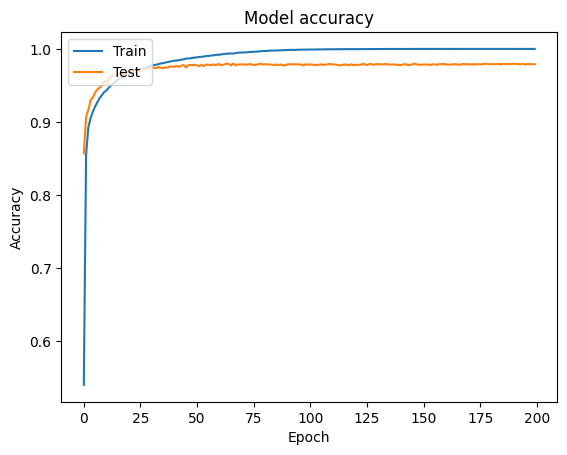

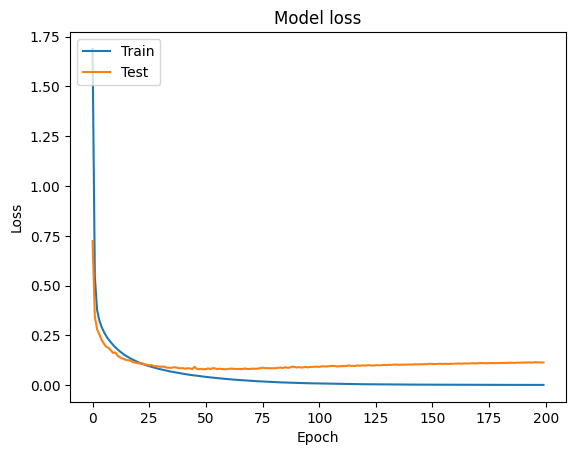

In [ ]:
# prompt: plot the training and validation accuracy graph and also losses

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


- In the first two arguments **(x_train, y_train)** we have indicated the data with which we will train the model in the form of Numpy arrays.

- The **batch_size** argument indicates the number of data that we will use for each update of the model parameters.

- The **epochs** argument indicate the number of times we will use all the data in the learning process.

### 8.3 Evaluate model with evaluate() method <a class="anchor" id="8.3"></a>


- Our model has been compiled and trained.

- Now, we come to the final step.

- The model can now be evaluated with the **evaluate()** method as follows:



In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9710 - loss: 0.1297


## 9. Accuracy of the model <a class="anchor" id="9"></a>

[Back to Table of Contents](#0.1)

- Now, I will check the accuracy of the model.

- We can print the accuracy as follows:-



In [ ]:
print('Test accuracy:', round(test_acc,3))

Test accuracy: 0.976


## 10. Confusion-matrix <a class="anchor" id="10"></a>

[Back to Table of Contents](#0.1)


- In Machine Learning, a very useful tool to evaluate the model is **Confusion Matrix**.

- It is a table with rows and columns that count the predictions in comparison with the real values.

- This table can be used to understand the performance of the model.

- It is very useful to show explicitly when one class is confused with another.

- A confusion matrix for a binary classifier is shown below:-

![Confusion-Matrix for a Binary Classifier](https://miro.medium.com/max/807/1*UIFVpCx4h1yW1WqRS-2C2w.png)

- **True Positives (TP)**, **True Negatives (TN)**, **False Positives (FP)** and **False Negatives (FN)** are the four different possible outcomes of a single prediction for a two-class case with classes “1” (“positive”) and “0” (“negative”).

- A **False Positive (FP)** is when the outcome is incorrectly classified as positive, when it is in fact negative. A **False Negative (FN)** is when the outcome is incorrectly classified as negative when it is in fact positive. **True Positives (TP)** and **True Negatives (TN)** are obviously correct classifications.

- With this confusion matrix, the accuracy can be calculated by adding the values of the diagonal and dividing them by the total:

**Accuracy = (TP + TN) / (TP + FP + FN + TN)**


- There is another metric called **Sensitivity (or recall)** that tells us how well the model avoids false negatives:

**Sensitivity = TP / (TP + FN)**


- From the confusion matrix, several other metrics can be obtained.

- But in this case, there are 10 classes instead of 2. So, in this case, Scikit-learn package can be used to evaluate the quality of the model by calculating the confusion matrix.

- The following code can be used to generate the confusion-matrix:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


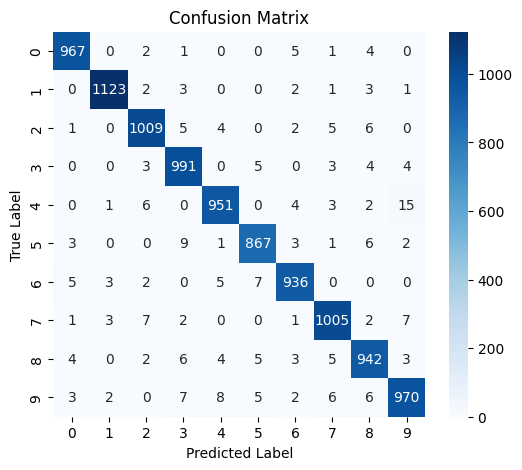

In [ ]:
# plot confusion matrix using heatmap with blue colors

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
y_pred = model.predict(x_test)  # 10 output with propabalities
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1) # 0.1 0.0 0.1 0.0 0.05 0.7 0.05 0.0 0.0 0.0 = 5
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)  # 0 0 0 0 0 1 0 0 0 0 = 5
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
y_pred

array([[3.25946180e-11, 9.42603107e-10, 4.88048670e-07, ...,
        9.99969006e-01, 8.88706830e-10, 1.46279842e-08],
       [5.62243307e-10, 2.15459240e-05, 9.99978304e-01, ...,
        2.83771504e-14, 2.54324810e-08, 1.06930174e-16],
       [4.13056567e-09, 9.99759734e-01, 2.27493751e-06, ...,
        4.37820672e-05, 1.88509599e-04, 5.12655305e-08],
       ...,
       [4.48057334e-17, 5.93996931e-15, 2.54436885e-17, ...,
        1.44589407e-09, 3.48493857e-13, 1.55091018e-09],
       [1.99011448e-13, 1.25433992e-14, 1.42071149e-17, ...,
        3.72050616e-13, 3.06982542e-06, 3.61981387e-13],
       [9.82757076e-09, 2.44707421e-16, 2.97931124e-11, ...,
        9.97494839e-20, 1.23148422e-10, 1.42136537e-11]], dtype=float32)

In [ ]:
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# print the classification report

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes, digits=4))


              precision    recall  f1-score   support

           0     0.9827    0.9867    0.9847       980
           1     0.9920    0.9894    0.9907      1135
           2     0.9768    0.9777    0.9772      1032
           3     0.9678    0.9812    0.9744      1010
           4     0.9774    0.9684    0.9729       982
           5     0.9753    0.9720    0.9736       892
           6     0.9770    0.9770    0.9770       958
           7     0.9757    0.9776    0.9767      1028
           8     0.9662    0.9671    0.9666       974
           9     0.9681    0.9613    0.9647      1009

    accuracy                         0.9761     10000
   macro avg     0.9759    0.9759    0.9759     10000
weighted avg     0.9761    0.9761    0.9761     10000



- In this case, the elements of the diagonal represent the number of points in which the label predicted by the model coincides with the actual value of the label, while the other values indicate the cases in which the model has classified incorrectly.

- Therefore, the higher the values of the diagonal, the better the prediction will be.

- If we calculate the sum of the values of the diagonal divided by the total values of the matrix, we get the same accuracy that the evaluate() method has returned.

## 11. Generate predictions <a class="anchor" id="11"></a>

[Back to Table of Contents](#0.1)


- We have build the ANN model to classify the MNIST digits.

- Now, we need to know how we can use the trained model to make predictions.

- It consists in predict which digit represents an image.

- In order to do this, Keras supply the **predict()** method.

- To test this method we can choose any element.

- For simplicity, we will take one from the test dataset x_test. For example let’s choose the element 11 of this dataset x_test.

- Now, we will see the **predict()** method in action.

- We execute the following code, correctly predicts the value that it should predict.

In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


- The predict() method return a vector with the predictions for the whole dataset elements.

- We know which class gives the most probability of belonging by means of the argmax function of Numpy, which returns the index of the position that contains the highest value of the vector.

- Specifically, for item 11:

In [ ]:
np.argmax(predictions[11])

6

We can check it printing the vector returned by the method:

In [ ]:
print(predictions[11])

[6.1121330e-11 6.0500382e-21 2.6974369e-14 3.0819037e-18 1.8812244e-16
 3.8540191e-12 9.9999964e-01 3.1005540e-21 3.3167390e-07 4.1515887e-17]


- We see that the highest value in the vector is in the position 6.

- We can also verify that the result of the prediction is a vector whose sum of all its components is equal to 1, as expected.

- For this we can use:

In [ ]:
np.sum(predictions[11])

1.0

## 12.ANN - The complete example <a class="anchor" id="12"></a>

[Back to Table of Contents](#0.1)

- In this section, I will combine all the pieces together and write the complete ANN model for convenience.


## 14. References <a class="anchor" id="14"></a>


[Back to Table of Contents](#0.1)


- The concepts and ideas in this kernel are taken from the following books:

  - 1. Deep Learning with Python by Francois Chollet.

  - 2. Advanced Deep Learning with Keras by Rowel Atienza

- So, now we will come to the end of this kernel.

- In the next kernel, we will demonstrate how we can improve these classification results using convolutional neural networks (CNN) for the same MNIST digits example.

I hope you find this kernel useful and enjoyable.

Thank you


[Go to Top](#0)